In [150]:
import re
import pandas as pd
import numpy as np
import pickle
import streamlit as st
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from PIL import Image,ImageFilter,ImageEnhance,ImageOps
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


import pickle

In [46]:
def recommd(product_data, name):
    # Assuming you have a recommendation matrix for products (similar to "recommend.csv" for courses)
    item_matrix = pd.read_csv("recommend.csv")  # Update with the actual file name

    # Map product names to their corresponding labels or IDs
    product_labels = []
    for j in name:
        matches = product_data[product_data["product_name"] == j]
        if not matches.empty:
            product_labels.append(matches["product_id"].values[0])

    # Recommend products based on the item_matrix
    recommended_products = []
    for label in product_labels:
        recommended_products.append(list(item_matrix.loc[int(label)].sort_values(ascending=False).iloc[:20].index))

    # Collect product information for each recommendation
    recommendations_info = []
    for recommendations, product_name in zip(recommended_products, name):
        for product_label in recommendations:
            recommendations_info.append({
                # (Your existing code to collect product information)
            })

    recommendations_df = pd.DataFrame(recommendations_info)
    return recommendations_df




In [42]:
data = pd.read_csv('recommend.csv')

In [43]:
print(data.head()) 
print(data.info()) 

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [81]:
def zero_preprocessing(cls_data):
    cls_data1=cls_data.copy()
    zero=[]
    for z in cls_data1.columns:
        value=((cls_data1[z]==0).mean()*100).round(2)
        zero.append(value)
    zero_df=pd.DataFrame({"Column_name":cls_data1.columns,"Zero_Percentage":zero}).sort_values("Zero_Percentage",ascending=False)
    col_to_rem=["youtube","days_since_last_visit","bounces","totals_newVisits","latest_isTrueDirect",
         "earliest_isTrueDirect","time_latest_visit","time_earliest_visit","device_isMobile","device_browser","device_operatingSystem","last_visitId","latest_visit_id",
        "visitId_threshold","earliest_visit_id","earliest_visit_number","latest_visit_number","days_since_first_visit",
      "earliest_source","latest_source","earliest_medium","latest_medium","earliest_keyword","latest_keyword",
        "device_deviceCategory","channelGrouping","geoNetwork_region","target_date","bounce_rate","historic_session_page","avg_session_time_page","products_array"]
    cls_data1.drop(col_to_rem,axis=1,inplace=True)
    for spar in cls_data1.columns:
        me=cls_data1[spar].mean()
        if spar=="has_converted" or spar=="transactionRevenue":
            continue
        values=[]
        for spar_val in cls_data1[spar].values:
            if spar_val<=0:
                values.append(me)
            else:
                values.append(spar_val)
        cls_data1[spar]=values
    zero1=[]
    for z in cls_data1.columns:
        value=((cls_data1[z]==0).mean()*100).round(2)
        zero1.append(value)
    zero_df_pre=pd.DataFrame({"Column_name":cls_data1.columns,"Zero_Percentage":zero1}).sort_values("Zero_Percentage",ascending=False)
    return zero_df,zero_df_pre,cls_data1



    

In [82]:
def outlier(cls_data):
    cls_data2=cls_data.copy()
    for out in cls_data2.columns:
        if out == "transactionRevenue":
            cls_data2[out]=np.log1p(cls_data2[out])
        elif out == "has_converted":
            continue
        else:
            cls_data2[out],_=stats.boxcox(cls_data2[out])
    return cls_data2
    

In [49]:
def predict(l,t):
    l,_=stats.boxcox(l)
    t=np.log1p(t)
    li=[]
    for i in l:
        li.append(i)
    li.append(t)
    with open("log_reg.pkl","rb") as lg:
        lg=pickle.load(lg)
    predicted=lg.predict([li])
    return predicted

In [103]:
# Example synthetic dataset
X = np.random.rand(100, 5)  # Features
y = np.random.choice([0, 1], size=100)  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Save the model as a .pkl file
with open("log_reg.pkl", "wb") as file:
    pickle.dump(log_reg_model, file)

In [102]:
def model_predict(data, tar, model):
    # Assuming data is a DataFrame or a 2D array-like structure
    # Assuming tar is a 1D array-like structure
    train_data, test_data, train_lab, test_lab = train_test_split(data, tar, test_size=0.2, random_state=42)
    train_pred = model.predict(train_data)
    test_pred = model.predict(test_data)
    
    train_acc = (accuracy_score(train_lab, train_pred) * 100).round(2)
    train_prec = (precision_score(train_lab, train_pred) * 100).round(2)
    train_recall = (recall_score(train_lab, train_pred) * 100).round(2)
    train_f1 = (f1_score(train_lab, train_pred) * 100).round(2)
    
    test_acc = (accuracy_score(test_lab, test_pred) * 100).round(2)
    test_prec = (precision_score(test_lab, test_pred) * 100).round(2)
    test_recall = (recall_score(test_lab, test_pred) * 100).round(2)
    test_f1score = (f1_score(test_lab, test_pred) * 100).round(2)
    
    return train_acc, train_prec, train_recall, train_f1, test_acc, test_prec, test_recall, test_f1score


In [52]:
def getting_data():
    cls_data=pd.read_csv("classification_data.csv")
    sh=cls_data.shape
    is_null=(cls_data.isnull().mean()*100).round(2)
    is_null_df=pd.DataFrame({"Column_Name":is_null.index,"Null_Percentage":is_null.values}).sort_values("Null_Percentage",ascending=False)
    cls_data.drop_duplicates(inplace=True)
    sh1=cls_data.shape
    des=cls_data.describe()
    zero_df,zerodf_pre,cls_data1=zero_preprocessing(cls_data)
    return sh,sh1,des,is_null_df,zero_df,zerodf_pre,cls_data1

In [55]:
def image_details(img):
    f=img.format
    h=img.size[0]
    w=img.size[1]
    arr=np.array(img)
    arr_size=arr.shape
    m=img.mode
    return f,h,w,arr,arr_size,m

In [ ]:
ran_class=RandomForestClassifier(n_estimators=20,random_state=44)
over_data=cls_data2
over_tar=cls_data1['has_converted']
ran_class.fit(over_data,over_tar)
val=ran_class.feature_importances_*100
feature_df=pd.DataFrame({"Columns":over_data.columns,"Feature_percentage":val}).sort_values("Feature_percentage",ascending=False)
st.dataframe(feature_df)
over_data.drop(["sessionQualityDim","avg_visit_time","geoNetwork_longitude","geoNetwork_latitude"],axis=1,inplace=True)
print(feature_df)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an SVM model
svm_model = SVC(kernel='linear')  # You can choose the appropriate kernel based on your data

# Train the SVM model
svm_model.fit(X_train, y_train)

# Save the trained SVM model as a .pkl file
with open("svm_model.pkl", "wb") as file:
    pickle.dump(svm_model, file)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an knn model
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

# Save the trained KNN model as a .pkl file
with open("knn_model.pkl", "wb") as file:
    pickle.dump(knn_model, file)
    
with open("knn_model.pkl", "rb") as lg:
    knn_model = pickle.load(lg)

In [108]:
X = np.random.rand(100, 5)  # Features
y = np.random.choice([0, 1], size=100)  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Logistic Regression model
log_reg_model = LogisticRegression()

# Train the Logistic Regression model
log_reg_model.fit(X_train, y_train)

# Save the trained Logistic Regression model as a .pkl file
with open("log_reg.pkl", "wb") as file:
    pickle.dump(log_reg_model, file)

In [109]:
# Load the log model from the file
with open("log_reg.pkl", "wb") as file:
    pickle.dump(log_reg_model, file)

# Assuming you have the necessary data loaded (X_train, X_test, y_train, y_test)
# Make predictions using the loaded log model
train_acc, train_prec, train_recall, train_f1, test_acc, test_prec, test_recall, test_f1score = model_predict(X, y, log_reg_model)

# Display the performance metrics
score_df1 = pd.DataFrame(
    {
        "Accuracy": [train_acc, test_acc],
        "Precision": [train_prec, test_prec],
        "Recall": [train_recall, test_recall],
        "F1 Score": [train_f1, test_f1score],
    },
    index=["Training Score", "Testing Score"]
)

print(score_df1)


                Accuracy  Precision  Recall  F1 Score
Training Score      62.5      63.16   60.00     61.54
Testing Score       65.0      58.33   77.78     66.67


In [89]:
# Load the SVM model from the file
with open("svm_model.pkl", "rb") as file:
    svm_model = pickle.load(file)

# Assuming you have the necessary data loaded (X_train, X_test, y_train, y_test)
# Make predictions using the loaded SVM model
train_acc, train_prec, train_recall, train_f1, test_acc, test_prec, test_recall, test_f1score = model_predict(X, y, svm_model)

# Display the performance metrics
score_df = pd.DataFrame(
    {
        "Accuracy": [train_acc, test_acc],
        "Precision": [train_prec, test_prec],
        "Recall": [train_recall, test_recall],
        "F1 Score": [train_f1, test_f1score],
    },
    index=["Training Score", "Testing Score"]
)

print(score_df)



                Accuracy  Precision  Recall  F1 Score
Training Score      55.0      53.12   44.74     48.57
Testing Score       40.0      33.33   50.00     40.00


In [111]:
# Load the knn model from the file
with open("knn_model.pkl", "wb") as file:
    pickle.dump(knn_model, file)

# Assuming you have the necessary data loaded (X_train, X_test, y_train, y_test)
# Make predictions using the loaded knn model
train_acc, train_prec, train_recall, train_f1, test_acc, test_prec, test_recall, test_f1score = model_predict(X, y, knn_model)

# Display the performance metrics
score_df2 = pd.DataFrame(
    {
        "Accuracy": [train_acc, test_acc],
        "Precision": [train_prec, test_prec],
        "Recall": [train_recall, test_recall],
        "F1 Score": [train_f1, test_f1score],
    },
    index=["Training Score", "Testing Score"]
)
print(score_df2)



                Accuracy  Precision  Recall  F1 Score
Training Score     76.25      81.82   67.50     73.97
Testing Score      60.00      55.56   55.56     55.56


In [113]:
with open("log_reg.pkl", "rb") as lg:
    log_reg_model = pickle.load(lg)
            
# Assuming you have the necessary data loaded (X_train, X_test, y_train, y_test)
# Make predictions using the loaded logistic regression model
train_acc_log_reg, train_prec_log_reg, train_recall_log_reg, train_f1_log_reg, test_acc_log_reg, test_prec_log_reg, test_recall_log_reg, test_f1score_log_reg = model_predict(X, y, log_reg_model)

# Display the performance metrics for logistic regression
score_df_log_reg = pd.DataFrame(
    {
        "Accuracy": [train_acc_log_reg, test_acc_log_reg],
        "Precision": [train_prec_log_reg, test_prec_log_reg],
        "Recall": [train_recall_log_reg, test_recall_log_reg],
        "F1 Score": [train_f1_log_reg, test_f1score_log_reg],
    },
    index=["Training Score (Logistic Regression)", "Testing Score (Logistic Regression)"]
)
print(score_df2)



                Accuracy  Precision  Recall  F1 Score
Training Score     76.25      81.82   67.50     73.97
Testing Score      60.00      55.56   55.56     55.56


In [ ]:
# Load the SVM model
with open("svm_model.pkl", "rb") as sv:
    svm_model = pickle.load(sv)

# Assuming you have the necessary data loaded (X_train, X_test, y_train, y_test)
# Make predictions using the loaded SVM model
train_acc_svm, train_prec_svm, train_recall_svm, train_f1_svm, test_acc_svm, test_prec_svm, test_recall_svm, test_f1score_svm = model_predict(X, y, svm_model)

# Display the performance metrics for SVM
score_df_svm = pd.DataFrame(
    {
        "Accuracy": [train_acc_svm, test_acc_svm],
        "Precision": [train_prec_svm, test_prec_svm],
        "Recall": [train_recall_svm, test_recall_svm],
        "F1 Score": [train_f1_svm, test_f1score_svm],
    },
    index=["Training Score (SVM)", "Testing Score (SVM)"]
)

# Load the KNN model
with open("knn_model.pkl", "rb") as knn:
    knn_model = pickle.load(knn)

# Assuming you have the necessary data loaded (X_train, X_test, y_train, y_test)
# Make predictions using the loaded KNN model
train_acc_knn, train_prec_knn, train_recall_knn, train_f1_knn, test_acc_knn, test_prec_knn, test_recall_knn, test_f1score_knn = model_predict(X, y, knn_model)

# Display the performance metrics for KNN
score_df_knn = pd.DataFrame(
    {
        "Accuracy": [train_acc_knn, test_acc_knn],
        "Precision": [train_prec_knn, test_prec_knn],
        "Recall": [train_recall_knn, test_recall_knn],
        "F1 Score": [train_f1_knn, test_f1score_knn],
    },
    index=["Training Score (KNN)", "Testing Score (KNN)"]
)

# Display the performance metrics for all three models
combined_score_df = pd.concat([score_df_log_reg, score_df_svm, score_df_knn], axis=0)
st.dataframe(combined_score_df)


In [116]:
# Assuming you have an "amazon.csv" dataset with product information
amazon_data = pd.read_csv("amazon.csv")
amazon_data.drop_duplicates()

# Remove leading/trailing whitespaces from column names
amazon_data.columns = amazon_data.columns.str.strip()

# Check and print updated column names
print(amazon_data.columns)




Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [118]:
# Update the column name in the transformation
le = LabelEncoder()
amazon_data["product_name_label"] = le.fit_transform(amazon_data["product_name"])
product_names = amazon_data["product_name"].values
product_names = list(set(product_names))

selected_products = st.multiselect("Select any product:", product_names)


recommendations_df = recommd(amazon_data, selected_products)
st.dataframe(recommendations_df)

DeltaGenerator()

In [119]:
df = pd.read_csv("amazon.csv")

In [120]:
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [121]:
df.shape


(1465, 16)

In [122]:
# Check for missing values
def check_missing_values(dataframe):
    return dataframe.isnull().sum()

print(check_missing_values(df))
df[df.rating_count.isnull()]

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [123]:
# Remove rows with missing values in the rating_count column
df.dropna(subset=['rating_count'], inplace=True)
print(check_missing_values(df))

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [124]:
# Check for duplicates
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(df))

0


In [125]:
# Check data types
def check_data_types(dataframe):
    return dataframe.dtypes

print(check_data_types(df))

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [126]:
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%','').astype(float)/100

In [127]:
# The rating column has a value with an incorrect character, so we will exclude
# the row to obtain a clean dataset.
count = df['rating'].str.contains('\|').sum()
print(f"Total de linhas com '|' na coluna 'rating': {count}")
df = df[df['rating'].apply(lambda x: '|' not in str(x))]
count = df['rating'].str.contains('\|').sum()
print(f"Total de linhas com '|' na coluna 'rating': {count}")

Total de linhas com '|' na coluna 'rating': 1
Total de linhas com '|' na coluna 'rating': 0


In [128]:
df['rating'] = df['rating'].astype(str).str.replace(',', '').astype(float)
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)

In [129]:
print(check_data_types(df))


product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [130]:
# Creating the column "rating_weighted"
df['rating_weighted'] = df['rating'] * df['rating_count']

In [131]:
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

In [132]:
df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating_weighted',
       'sub_category', 'main_category'],
      dtype='object')

In [133]:
len(df)


1462

In [134]:
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_weighted,sub_category,main_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,101929.8,USBCables,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,175976.0,USBCables,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,30919.2,USBCables,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,396324.6,USBCables,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,71001.0,USBCables,Computers&Accessories


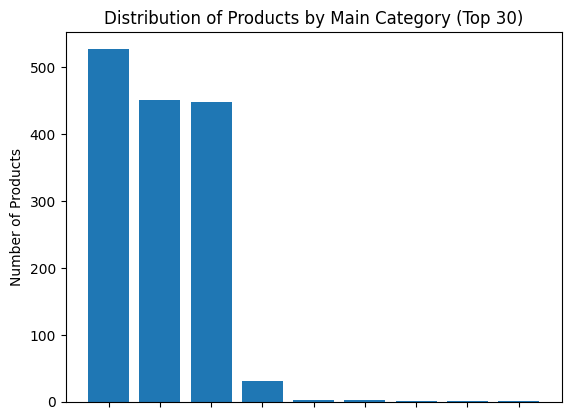

Top 30 main categories:
        Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 451
         Home&Kitchen                 447
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


In [135]:
#3-Exploratory Data Analysis (EDA) + Data visualization¶
#3.1
# Analyzing distribution of products by main category
main_category_counts = df['main_category'].value_counts()[:30] # Select only the top 30 main categories.
plt.bar(range(len(main_category_counts)), main_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Main Category (Top 30)')
plt.xticks(range(len(main_category_counts)), '') # hide X-axis labels
plt.show()

# Top 30 main categories 
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 30 main categories:')
print(top_main_categories.to_string(index=False))

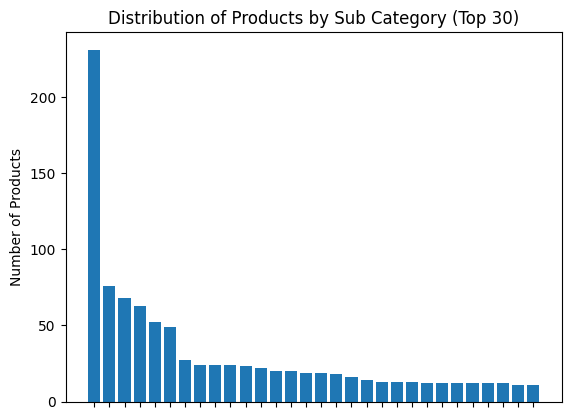

Top 30 sub categories:
            Sub Category  Number of Products
               USBCables                 231
            SmartWatches                  76
             Smartphones                  68
        SmartTelevisions                  63
                  In-Ear                  52
          RemoteControls                  49
           MixerGrinders                  27
              HDMICables                  24
                DryIrons                  24
                    Mice                  24
     InstantWaterHeaters                  23
             LintShavers                  22
              FanHeaters                  20
         ElectricHeaters                  20
         ElectricKettles                  19
            HandBlenders                  19
     WirelessUSBAdapters                  18
            WallChargers                  16
                Lapdesks                  14
          LaundryBaskets                  13
                 MicroSD        

In [136]:
# Analyzing distribution of products by last category
sub_category_counts = df['sub_category'].value_counts()[:30] # Select only the top 30 last categories.
plt.bar(range(len(sub_category_counts)), sub_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Sub Category (Top 30)')
plt.xticks(range(len(sub_category_counts)), '') # hide X-axis labels
plt.show()

# Top 30 sub categories 
top_sub_categories = pd.DataFrame({'Sub Category': sub_category_counts.index, 'Number of Products': sub_category_counts.values})
print('Top 30 sub categories:')
print(top_sub_categories.to_string(index=False))

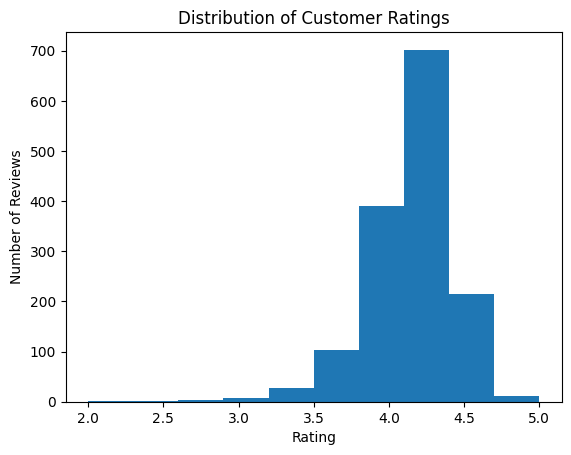

In [138]:
# 3.2 Analyze the distribution of customer ratings using a histogram.
# Plot histogram
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Customer Ratings')
plt.show()




In [139]:
# Create table with values per cluster
bins = [0, 1, 2, 3, 4, 5]  # Define bin edges
df['cluster'] = pd.cut(df['rating'], bins=bins, include_lowest=True, labels=['0-1', '1-2', '2-3', '3-4', '4-5'])
table = df['cluster'].value_counts().sort_index().reset_index().rename(columns={'index': 'Cluster', 'cluster': 'Number of Reviews'})
print(table)

  Number of Reviews  count
0               0-1      0
1               1-2      1
2               2-3      8
3               3-4    525
4               4-5    928


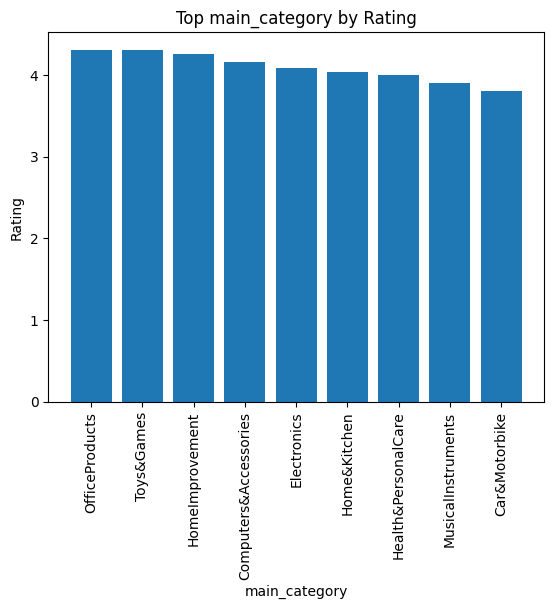

           main_category    rating
0         OfficeProducts  4.309677
1             Toys&Games  4.300000
2        HomeImprovement  4.250000
3  Computers&Accessories  4.155654
4            Electronics  4.081749
5           Home&Kitchen  4.040716
6    Health&PersonalCare  4.000000
7     MusicalInstruments  3.900000
8          Car&Motorbike  3.800000


In [140]:
# Calculate the top main categories
top = df.groupby(['main_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['main_category'], top['rating'])

# Add labels and title
plt.xlabel('main_category')
plt.ylabel('Rating')
plt.title('Top main_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('main_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

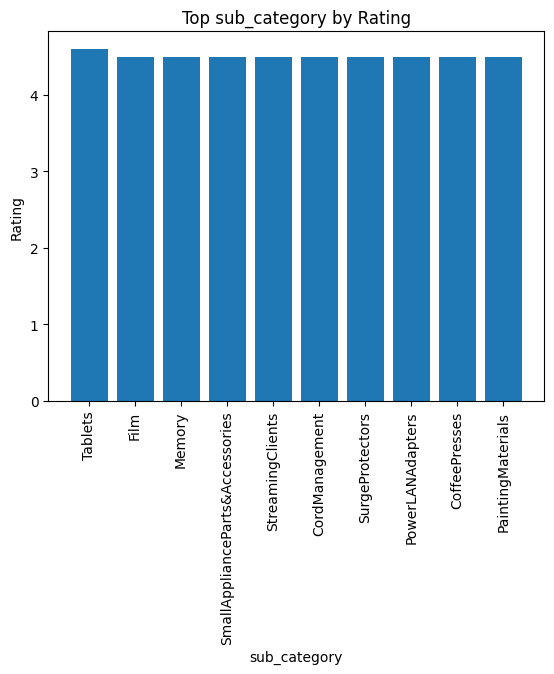

                        sub_category  rating
0                            Tablets     4.6
1                               Film     4.5
2                             Memory     4.5
3    SmallApplianceParts&Accessories     4.5
4                   StreamingClients     4.5
..                               ...     ...
202                   InkjetPrinters     3.6
203                       PCHeadsets     3.5
204                        3DGlasses     3.5
205                       DustCovers     3.4
206                 ElectricGrinders     3.3

[207 rows x 2 columns]


In [141]:
# Calculate the top sub categories
top = df.groupby(['sub_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['sub_category'], top['rating'])

# Add labels and title
plt.xlabel('sub_category')
plt.ylabel('Rating')
plt.title('Top sub_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('sub_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

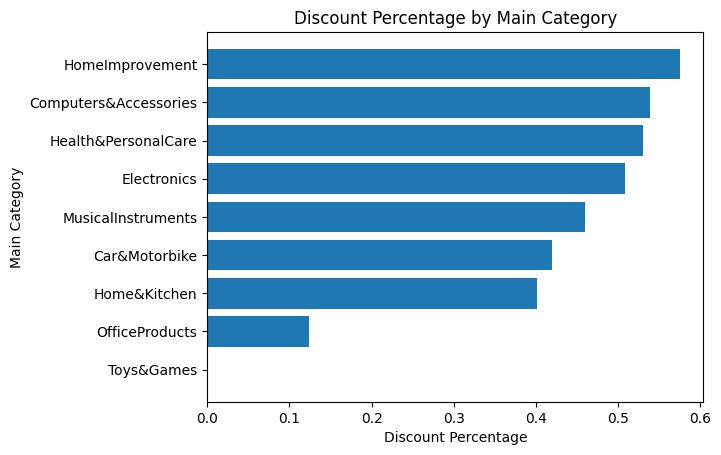

           Main Category  Mean Discount Percentage
0             Toys&Games                  0.000000
1         OfficeProducts                  0.123548
2           Home&Kitchen                  0.401745
3          Car&Motorbike                  0.420000
4     MusicalInstruments                  0.460000
5            Electronics                  0.508289
6    Health&PersonalCare                  0.530000
7  Computers&Accessories                  0.539202
8        HomeImprovement                  0.575000


In [142]:
# sort the means in descending order
mean_discount_by_category = df.groupby('main_category')['discount_percentage'].mean()
mean_discount_by_category = mean_discount_by_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_category.index, mean_discount_by_category.values)
plt.title('Discount Percentage by Main Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Main Category')
plt.show()

table = pd.DataFrame({'Main Category': mean_discount_by_category.index, 'Mean Discount Percentage': mean_discount_by_category.values})

print(table)

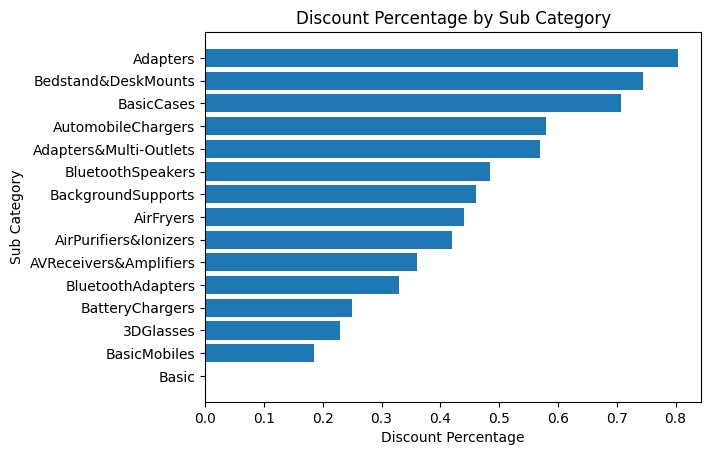

              Sub Category  Mean Discount Percentage
0                    Basic                  0.000000
1             BasicMobiles                  0.185556
2                3DGlasses                  0.230000
3          BatteryChargers                  0.250000
4        BluetoothAdapters                  0.330000
5   AVReceivers&Amplifiers                  0.360000
6    AirPurifiers&Ionizers                  0.420000
7                AirFryers                  0.440000
8       BackgroundSupports                  0.460000
9        BluetoothSpeakers                  0.485000
10  Adapters&Multi-Outlets                  0.570000
11      AutomobileChargers                  0.580000
12              BasicCases                  0.707500
13     Bedstand&DeskMounts                  0.745000
14                Adapters                  0.803333


In [143]:
# sort the means in descending order
mean_discount_by_sub_category = df.groupby('sub_category')['discount_percentage'].mean().head(15)
mean_discount_by_sub_category = mean_discount_by_sub_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_sub_category.index, mean_discount_by_sub_category.values)
plt.title('Discount Percentage by Sub Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Sub Category')
plt.show()

table = pd.DataFrame({'Sub Category': mean_discount_by_sub_category.index, 'Mean Discount Percentage': mean_discount_by_sub_category.values})

print(table)

In [144]:
le = LabelEncoder()
df['user_id_encoded'] = le.fit_transform(df['user_id'])

# Create a new dataframe with the user_id frequency table
freq_table = pd.DataFrame({'User ID': df['user_id_encoded'].value_counts().index, 'Frequency': df['user_id_encoded'].value_counts().values})

# Display the dataframe
print(freq_table)
id_example = freq_table.iloc[0,0]
print(id_example)

      User ID  Frequency
0        1045         10
1         622          8
2         673          8
3         253          7
4          87          7
...       ...        ...
1186      505          1
1187       11          1
1188      897          1
1189      369          1
1190      432          1

[1191 rows x 2 columns]
1045


In [145]:
def recommend_products(df, user_id_encoded):
    # Use TfidfVectorizer to transform the product descriptions into numerical feature vectors
    tfidf = TfidfVectorizer(stop_words='english')
    df['about_product'] = df['about_product'].fillna('')  # fill NaN values with empty string
    tfidf_matrix = tfidf.fit_transform(df['about_product'])

    # Get the purchase history for the user
    user_history = df[df['user_id_encoded'] == user_id_encoded]

    # Use cosine_similarity to calculate the similarity between each pair of product descriptions
    # only for the products that the user has already purchased
    indices = user_history.index.tolist()

    if indices:
        # Create a new similarity matrix with only the rows and columns for the purchased products
        cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)

        # Create a pandas Series with product indices as the index and product names as the values
        products = df.iloc[indices]['product_name']
        indices = pd.Series(products.index, index=products)

        # Get the indices and similarity scores of products similar to the ones the user has already purchased
        similarity_scores = list(enumerate(cosine_sim_user[-1]))
        similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]

        # Sort the similarity scores in descending order
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top 5 most similar products
        top_products = [i[0] for i in similarity_scores[1:6]]

        # Get the names of the top 5 most similar products
        recommended_products = df.iloc[top_products]['product_name'].tolist()

        # Get the reasons for the recommendation
        score = [similarity_scores[i][1] for i in range(5)]

        # Create a DataFrame with the results
        results_df = pd.DataFrame({'Id Encoded': [user_id_encoded] * 5,
                                   'recommended product': recommended_products,
                                   'score recommendation': score})

        return results_df

    else:
        print("No purchase history found.")
        return None

In [157]:
recommend_products(df, 0)


,Id Encoded,recommended product,score recommendation
0,0,7SEVEN® Compatible Vu Smart Tv Remote Control ...,1.000000
1,0,Electvision Remote Control for led Smart tv Co...,0.314642
2,0,Sony TV - Remote Compatible for Sony LED Remot...,0.298038
3,0,7SEVEN® Compatible with Fire Tv Stick Remote w...,0.282251
4,0,LRIPL Mi Remote Control with Netflix & Prime V...,0.257709
